# TP3 Grupo 12

In [1]:
# Importando librerías  
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from collections import Counter

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
%matplotlib inline

from sklearn.naive_bayes import GaussianNB, MultinomialNB

from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier


Función para evaluación del modelo con regresión logística, variando datos de entrada

In [ ]:
def logistic_model(X_train, X_test, y_train, y_test):
    '''Creacióm del modelo de Regresión Logistica variando datos de entrada'''
    
    lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cholesky")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    lr.fit(X_train_scaled, y_train)
    return lr

In [ ]:
def mostrar_resultados(y_test, y_pred):
    confusion_matrix(y_test, y_test_pred)
    #plt.figure(figsize=(12, 12))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f');
    plt.title("Confusion matrix")
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()
    print(classification_report(y_test, y_test_pred))

## 1. Lectura de DataFrame 

El DataFrame usado para este TP consta de datos provenientes de la plataforma Kaggle, en el que se evalúan algunas variables relacionadas con evaluación de posible fraude en transacciones bancarias realizadas con tarjetas de crédito. Se trata de un Dataset desbalanceado, respecto a la proporción en la variable target (fraud). 

In [2]:
data = pd.read_csv(r'card_transdata.csv', sep=',')
print(f'El dataframe de transacciones está compuesto por {data.shape[1]} columnas y {data.shape[0]} filas') 
print(data.sample(3))
data.shape

El dataframe de transacciones está compuesto por 8 columnas y 1000000 filas
        distance_from_home  distance_from_last_transaction  \
514064            1.649850                        0.986466   
838724           22.024146                        0.736133   
989958            1.888643                        0.270915   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
514064                        5.655958              0.0        1.0   
838724                        4.507864              1.0        1.0   
989958                        0.206799              0.0        0.0   

        used_pin_number  online_order  fraud  
514064              0.0           0.0    0.0  
838724              0.0           0.0    0.0  
989958              0.0           0.0    0.0  


(1000000, 8)

## 2. Descripción breve del DataFrame.


El DataFrame en estudio cuenta con 8 columnas y un total de 1000000 filas (no tiene valores nulos). 

Las columnas contenidas en el DataFrame son: 

2.1 distance_from_home. Indica la distancia desde casa respecto al lugar en donde ocurrió la transacción. Ejemplo: 2.813104. 

2.2 distance_from_last_transaction. Indica la distancia entre el punto de la transacción con respecto a la última transacción registrada. Ejemplo: 0.153290.

2.3 ratio_to_median_purchase_price. es la relación entre el monto de la transacción y el precio medio de compra del cliente. Ejemplo: 1.135134.

2.4 repeat_retailer. Columna con variables dummies para indicar con 1 si la transacción se realizó desde el mismo minorista y con 0 si no. Ejemplo: 1.0.

2.5 used_chip. Columna con variables dummies para indicar con 1 si en la transacción se utilizó el chip de la tarjeta de crédito y con 0 si no se utilizó. Ejemplo: 0.0.

2.6 used_pin_number. Columna con variables dummies que indica con 1 si en la transacción se usó el número de pin y con 0 en caso contrario. Ejemplo: 1.0.

2.7 online_order. Columna con variables dummies en la que se indica con 1 si la transacción corresponde a un pedido en línea y 0 si no fue así. Ejemplo: 1.0. 

2.8 fraud. Columna con variable target que indica si la transacción fue identificada como fraude (1) o no (0). Ejemplo: 1.0.

In [ ]:
# Resumen de nombre y tipo de dato por columna

print('\n')
print('-----------Tipo de datos por columna-----------')
print(data.dtypes)

## 3. Distribución de los datos.  

In [ ]:
# Para saber valores no nulos

msno.bar(data)

## Observemos la correlación entre las variables

In [ ]:
# Matriz de correlación

corr_matrix = data.corr(method='spearman')
corr_matrix

In [ ]:
# Heatmap matriz de correlaión

f, ax = plt.subplots(figsize = (9, 8))
sns.heatmap(corr_matrix, ax = ax, annot=True, cmap= 'Reds', linewidths= 0.5)

En el resultado se puede apreciar una fuerte correlación (0.56) entre las variables distancia desde casa y si la compra se realizó en el mismo minorista. Además, se puede apreciar un adelanto de las variables que influyen en la variable de nuestro interés (fraude) donde la razón respecto a la media de compra es la variable que tiene mayor correlación con fraude (0.3) aunque el valor no es tan alto, le sigue la variable compra en línea con 0.19 y distancia desde casa con 0.095. Un punto importante resalta de este análisis, aparecen dos variables con correlación negativa con fraude, las cuales son uso de chip (-0.061) y uso de número de pin con un valor de -0.1 lo que se podría interpretar que el uso de esto dos métodos de seguridad son efectivos para evitar el fraude en las transacciones.

In [ ]:
VAMOS A HACER UN PAIR PLOT PARA VER SI LOS DATOS ESTÁN BIEN DIFERENCIADOS ENTRE CLASES.
PARA MAYOR VELOCIDAD AL GRAFICAR, USAREMOS UN DF MUY PEQUEÑO.
PARA ENTRENAR EL MODELO SE USARÁ UNO MÁS GRANDE
X_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.99,
                                                    random_state=0,
                                                    stratify=y)

In [ ]:
y_train.value_counts()

In [ ]:
# DE IGUAL FORMA, SE ESCALARÁN LOS DATOS PARA VISUALIZAR MEJOR EL PAIR PLOT.
ss = StandardScaler()
xscaled = pd.DataFrame(ss.fit_transform(x_train),columns = x_train.columns)

In [ ]:
LAS CLASES PARECEN ESTAR BIEN SEPARADAS PARA ALGUNAS VARIABLES 
POR LO QUE ES VIABLE HACER UN MODELO DE CLASIFICACIÓN.
pd.plotting.scatter_matrix(xscaled, c=y_train, figsize=(20,20),
                           marker='o', )

Dentro del DataFrame no se encuentran valores nulos, todas las variables a usar en los diferentes modelos (KNN, Naives Bayes y Regresión Logística) tienen los los datos completos. 

## * Variable TARGET a Determinar

Según el análisis realizado y la propuesta original en el dataset, la variable target a considerar, en la construcción de los diferentes modelos,  será la columna "fraud".

In [ ]:
# Considerando lo anterior, resulta necesario conocer la proporción de la variable target
count_classes = data.fraud.value_counts(sort=True)
count_classes

Para una población de 1000000 de transacciones, tan sólo 87403 son etiquetadas como casos de fraude. Representan aproximadamente el 9% de las muestras.

In [ ]:
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia de numero de observaciones")
plt.xlabel("Class")
plt.ylabel("Numero de observaciones");

# Propuestas 

1. Trabajar con dataset total. (1MM de registros, proporción variable target 90-10)
2. Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 


A partir de la selección del dataset: 

1. Aplicar los siguientes modelos sobre el conjunto de datos: 

   1.a. KNN. (Carlos)

   1.b. Naives Bayes. (Santiago)
   
   1.c. Regresión Logística. (Moises) 

## Generación de Hipótesis nula

Considerando que el dataframe elegido presenta una proporción aproximada 90-10 entre las clases a predecir, el punto de partida y el valor a mejorar por los posteriores modelos, será: 

In [ ]:
count_classes = data.fraud.value_counts(sort=True)
count_classes[0]/data.shape[0]

## 4. Aplicando modelo de Regresión Logística

4.1 Full Datos. 
    
    Como 1era aproximación para la generación del modelo, será usado todo el volumne de datos. Sabiendo que la variable a predecir se encuentra desbalanceada.  

In [ ]:
# Para considerar las variables predictoras

feature_cols = [x for x in data.columns if ((x != 'fraud'))]
feature_cols

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = data[feature_cols]
y = data['fraud']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        stratify=y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )  

In [ ]:
# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Entrenando al modelo 
# Instanciamos un objeto de esa clase
logistic_regression = LogisticRegression()
# Ajustamos esta instancia con los datos de entrenamiento
logistic_regression.fit(X_train_scaled, y_train)
print(logistic_regression.coef_)
print(logistic_regression.intercept_)


In [ ]:
# Hacemos predicciones con el modelo entrenado
y_train_pred = logistic_regression.predict(X_train_scaled)
y_test_pred = logistic_regression.predict(scaler.transform(X_test)) # Notar que debemos escalar los datos de testeo antes de realizar predicciones

In [ ]:
# Elaboramos la matriz de confusión
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [ ]:
logistic_regression.predict_proba(X_test)

In [ ]:
logistic_regression.predict_proba(X_test).shape

In [ ]:
# Calculemos el accuracy
accuracy_score(y_test, y_test_pred)

In [ ]:
# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_test_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

In [ ]:
puntajef1 = f1_score(y_test, y_test_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

In [ ]:
# Haciendo un resumen de los parámetros obtenidos usando todo el dataset 
print(classification_report(y_test, y_test_pred))

En la matriz de confusión se obtienen alrededor de 7000 fallos y 10000 aciertos dando un recall de 0.60 y es el valor que queremos mejorar. También es interesante notar que en la columna de f1-score obtenemos muy buenos resultados, a pesar de ello deben ser considerados con ciertas reservas, pues están reflejando una realidad parcial. 

Estas métricas serán consideradas como línea base para comparación y búsqueda de mejora. Un aspecto a evaluar será el tema del hecho que el dataset se encuentra desbalanceado. 

## 4.2. Buscando balancear las clases

### 4.2.1 Penalización de clases mayoritarias

Según literatura de LogisticRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- class_weight: dict or ‘balanced’, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

- solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification.



In [ ]:
penalidad = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cholesky",class_weight="balanced")
penalidad.fit(X_train_scaled, y_train)

y_test_pred = penalidad.predict(scaler.transform(X_test))

In [ ]:
mostrar_resultados(y_test, y_test_pred)

### 4.2.1 Undersampling (us) sobre la clase predominante (No Fraude)

In [ ]:
# us trabaja parecido a KNN
us = NearMiss(n_neighbors=3, version=1)
# Para cambiar proporciones podemos usar version = 3

X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución antes de resampling {Counter(y_train_res)}')

In [ ]:
model = logistic_model(X_train_res, X_test, y_train_res, y_test)
y_test_pred = model.predict(scaler.transform(X_test))

mostrar_resultados(y_test, y_test_pred)

Identifica todos los fraudes porque la probabilidad en el set de entrenamiento la proporción es 50/50. Aumentan los falsos positivos, disminuye el f1 score.

### 4.2.2 Oversampling (os) de la clase minoritaria (Fraude)

Para este caso se usará RandomOverSampler para crear nuevas muestras "sintéticas" para la clase 'Fraude'. 
Al usar 'sampling_strategy' = 0.5, estamos creando muestras sintéticas hasta alcanzar un numero de muestras igual al 50% de la clase mayoritaria (No Fraude), es decir 365039 casos Fraude.

In [ ]:
os =  RandomOverSampler(sampling_strategy = 0.5, random_state=1234)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución después de resampling {Counter(y_train_res)}')

In [ ]:
model = logistic_model(X_train_res, X_test, y_train_res, y_test)
y_test_pred = model.predict(scaler.transform(X_test))

mostrar_resultados(y_test, y_test_pred)

Aumentan los falsos negativos, disminuyen los falsos positivos, aumenta la precisión y el F1 score. Se identifican menor cantidad de casos de Fraude que el caso anterior. 

### 4.2.3 Aplicando modelos conjuntos. (Oversampling (os) y Undersampling (us)) -- Smote-Tomek 

* SMOTE (Synthetic Minority Over-sampling Technique) para oversampling. Puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. 

* Tomek para undersampling. Elimina los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de las clases).

In [ ]:
os_us = SMOTETomek(sampling_strategy=0.5, random_state=1234)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución antes de resampling {Counter(y_train_res)}')

In [ ]:
model = logistic_model(X_train_res, X_test, y_train_res, y_test)
y_test_pred = model.predict(scaler.transform(X_test))

mostrar_resultados(y_test, y_test_pred)

Aumentan los falsos negativos. 

## 5. Aplicando modelo Naiyes Bayes

In [ ]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [ ]:
data.head()

### 5.1. Naive Bayes (Todos los datos)

In [ ]:
# VOLVEMOS A SEPARAR EN TRAIN Y TEST PERO ESTA VEZ
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [ ]:
model1 = GaussianNB()
model1.fit(x_train, y_train); 

In [ ]:
model2 = MultinomialNB()
model2.fit(x_train, y_train)

In [ ]:
y_pred_gnb = model1.predict(x_test)
y_pred_mnb = model2.predict(x_test)

In [ ]:
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test)}')
print()
print (f'Recall para modelo gaussiano: {recall_score(y_test,y_pred_gnb)}')
print (f'Recall para modelo multinomial: {recall_score(y_test,y_pred_mnb)}')

In [ ]:
g = sns.heatmap(confusion_matrix(y_test,model1.predict(x_test)),annot=True, fmt='.0f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

In [ ]:
g = sns.heatmap(confusion_matrix(y_test,model2.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')

### 5.2. Naive Bayes (Balanceado)

### Para este modelo sólo será construido un DataFrame considerando la siguiente premisa: 
* Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 

In [ ]:
# Dataset de sólo no fraude 
df_nf = data.loc[data['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940, random_state=123)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = data.loc[data['fraud'] == 1]
df_f.fraud.value_counts()

In [ ]:
definitivo = pd.merge(df_nf2, df_f, how = 'outer')
definitivo.fraud.value_counts()

display(definitivo.sample(10))

In [ ]:
X = definitivo.iloc[:, 0:-1]
y = definitivo.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [ ]:
model1 = GaussianNB()
model1.fit(x_train, y_train);  

In [ ]:
model2 = MultinomialNB()
model2.fit(x_train, y_train)

In [ ]:
y_pred_gnb = model1.predict(x_test)
y_pred_mnb = model2.predict(x_test)

In [ ]:
print (f'Accuracy para modelo gaussiano: {accuracy_score(y_pred_gnb,y_test)}')
print (f'Accuracy para modelo multinomial: {accuracy_score(y_pred_mnb,y_test),}')
print()
print (f'Recall para modelo gaussiano: {recall_score(y_test,y_pred_gnb)}')
print (f'Recall para modelo multinomial: {recall_score(y_test,y_pred_mnb)}')

In [ ]:
g = sns.heatmap(confusion_matrix(y_test,model1.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

In [ ]:
g = sns.heatmap(confusion_matrix(y_test,model2.predict(x_test)),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')

## 6. Aplicando modelo KNN

### 6.1. KNN (Todos los datos)

In [3]:
# Construimos la matriz de features donde tomamos todo el DataFrame en la eje X
X = data.iloc[:, 0:-1]
# Construimos el vector target Y con la columna Fraud del DF
y = data['fraud']

In [ ]:
## Serán generados los datos de entrenamiento y test
# El argumento stratify nos permite generar una división que respeta la misma proporción entre clases en ambos sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [ ]:
# Clasificando el dataframe con el modelo KNN 
# Inicialmente tomamos el hiperparametro por defecto, sin estandarizar la matriz

knn = KNeighborsClassifier()
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test)

#### Entre los datos de pruebas y prediccion, vemos que se obtiene un 98% de Precision de conincidencia entre la muestra real y la prediccion

In [ ]:
# Evaluamos el accuracy del modelo
accuracy_score(y_test, y_pred).round(2)

#### Optimizamos el valor del hiperparametro K, haciendo unsando recall_score tomando un rango de 1 a 10 para posterioirmente determinar el valor optimo en K

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
#optimizar el valor de K

scores_para_df = []

for i in tqdm(range(1,10)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    dict_row_score = {'recall': recall_score(y_test, y_pred), 'n_neighbors':i}
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [ ]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

In [ ]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['recall'], color='g');
plt.xlabel('n_neighbors'); plt.ylabel('Recall')
plt.grid(); plt.show()

#### Validamos cual es el valor que maximiza el score de recall, siendo en este caso el n_neighbors= 1

### 6.2. Estandarizacion de los datos de train

In [ ]:
#Estandarizacion Matriz
# Utilizamos sklearn para estandarizar la matriz de features

scaler = StandardScaler()
X_train_Knn_scaler = scaler.fit_transform(X_train)
X_test_Knn_scales = scaler.fit_transform(X_test)

In [ ]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train_Knn_scaler, axis=0).round(2))
print('Desvio:', np.std(X_train_Knn_scaler, axis=0).round(2))

In [ ]:
# Hacemos predicciones con el modelo entrenado
y_train_knn_pred = knn.predict(X_train_Knn_scaler)
y_test_Knn_pred = knn.predict(scaler.transform(X_test)) # Notar que debemos escalar los datos de testeo antes de realizar predicciones

In [ ]:
# Calculamos nuevamente los scores de Recall pero esta vez sobre los features estandarizados:

scores_para_df_standard = []

for i in tqdm(range(1,10)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_Knn_scaler, y_train_knn_pred)
    y_pred = model.predict(X_test_Knn_scales)
    dict_row_score = {'recall': recall_score(y_test_Knn_pred, y_pred), 'n_neighbors':i}
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df_standard.append(dict_row_score)

In [ ]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores_standard = pd.DataFrame(scores_para_df_standard)
df_scores_standard

In [ ]:
# Graficamos los resultados
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['recall'], color='g');
plt.xlabel('n_neighbors'); plt.ylabel('Recall')
plt.grid(); plt.show()

Ahora obteniendo el valor optimo, conseguido en el paso anterioir, hacemos de nuevo el entramiento de los datos

In [ ]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores_standard.loc[df_scores.recall == df_scores.recall.max(), 'n_neighbors'].values[0]
best_k

In [ ]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de recall_score
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

Obtenemos un ajuste cerca de 100%

In [ ]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train)).round(2)

In [ ]:
# Generación de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm, annot=True, fmt='.0f')
plt.title("Confusion matrix")
plt.ylabel('Real')
plt.xlabel('Predicción');
plt.show()

* Casos negativos reales 62.397, correspondientes a la primera fila.

* Casos positivos reales 14.318, correspondientes a la segunda fila.

* Casos negativos predichos, corresponden a la primera columna.

* Casos positivos predichos, corresponden a la segunda columna.

* Diagonal en la matriz corresponde a las clasificaciones correctas. Siendo 62.397 casos negativos y 14.318 a casos positivos de Fraude.
Los Elementos de la diagonal inversa, nuestro modelo los confude siendo 165.752 casos mal etiquetado para negativo y 7.533 para positivo de fraude.

* Finalmente calculamos la exactitud de nuestro modelo, de manera manual y computada, siendo ambas de precision del 92%

In [ ]:
((cm[0,0] + cm[1,1]) / len(y_pred)).round(2)

In [ ]:
accuracy_score(y_test, y_pred).round(2)

### 6.3 Balanceo de clases

Partiendo desde la misma premisa considerada para Naives Bayes, será usado el DataFrame generado de manera manual obtenemos lo siguiente:


In [4]:
# Dataset de sólo no fraude 
df_nf = data.loc[data['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = data.loc[data['fraud'] == 1]
df_f.fraud.value_counts()

0.0    203940
Name: fraud, dtype: int64


1.0    87403
Name: fraud, dtype: int64

In [5]:
df = pd.merge(df_nf2, df_f, how = 'outer')
df.fraud.value_counts(normalize=True).round(2)

0.0    0.7
1.0    0.3
Name: fraud, dtype: float64

In [6]:
display(df.sample(10))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
57781,22.240979,0.436778,0.721116,1.0,1.0,0.0,1.0,0.0
284929,6.522278,5.082920,9.094798,1.0,0.0,0.0,1.0,1.0
55532,15.754156,4.300985,0.999839,1.0,0.0,0.0,1.0,0.0
34862,1.902395,25.864208,0.139165,1.0,0.0,0.0,1.0,0.0
271540,1.020323,1.009397,12.532165,0.0,1.0,0.0,1.0,1.0
149849,5.155598,1.938809,2.058610,1.0,0.0,0.0,0.0,0.0
276803,97.669161,0.402303,5.842697,1.0,0.0,0.0,1.0,1.0
83874,78.008410,0.711507,0.177461,1.0,1.0,0.0,1.0,0.0
61744,1.494902,0.836659,0.938505,0.0,0.0,0.0,1.0,0.0
56623,28.946568,1.315995,1.462935,1.0,0.0,0.0,1.0,0.0


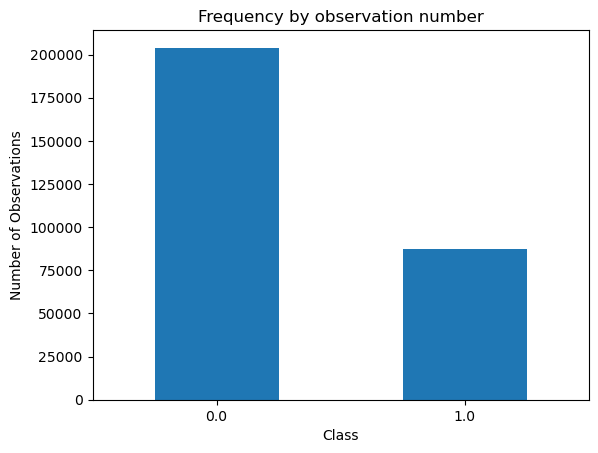

In [29]:
count_classes = pd.value_counts(df['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

Aplicamos los siete pasos para generar un modelo.

In [7]:
# Preparar matriz de *features* y vector *target*
X = df.iloc[: , :7]
y = df['fraud']

In [8]:
# Elegir los hiperparámetros del modelo. Instanciamos el modelo con su configuración por defecto
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
# Separar los sets de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_test)

In [10]:
# # Evaluamos el accuracy del modelo
accuracy_score(y_test, y_pred).round(2)

0.97

In [11]:
recall_score(y_test, y_pred)

0.9895321610578026

 Nuestro modelo puede clasificar correctamente el 97% de las observaciones del dataset de test.

In [12]:
# Ahora, vamos a evaluar el modelo

scores_para_definitivo = []

for i in tqdm(range(1, 21)):
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall_scores = recall_score(y_test, y_pred)
    dict_row_score = {'score_medio':np.mean(recall_scores),
                      'score_std':np.std(recall_scores), 'n_neighbors':i}
    
    scores_para_definitivo.append(dict_row_score)

100%|██████████| 20/20 [02:18<00:00,  6.91s/it]


In [13]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_definitivo)
# df_scores

In [14]:
# Generamos los límites inferior y superior
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

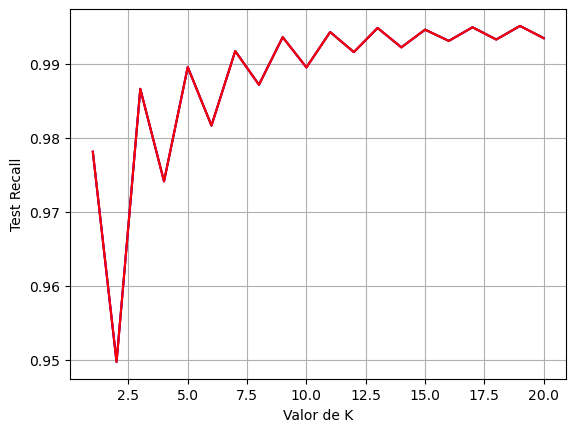

In [15]:
# Graficamos los resultados

plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color='r');
plt.xlabel('Valor de K'); plt.ylabel('Test Recall')
plt.grid(); plt.show()


In [16]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
18,0.995087,0.0,19,0.995087,0.995087


Por lo tanto, el valor de n_neighbors óptimo es 19.

Matriz de Confusión

In [17]:
confusion_matrix(y_test, y_pred)

array([[47918,  3137],
       [  143, 21638]], dtype=int64)

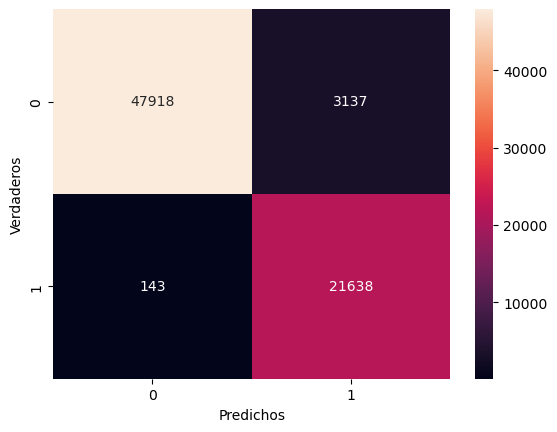

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     51055
         1.0       0.87      0.99      0.93     21781

    accuracy                           0.95     72836
   macro avg       0.94      0.97      0.95     72836
weighted avg       0.96      0.95      0.96     72836



## Usando la estrategia Resampling y Muestras sintéticas para datos Desbalanceados.

In [20]:
# Undersampling (us) sobre la clase predominante (No Fraude)

us = NearMiss(n_neighbors=3, version=1)
# Para cambiar proporciones podemos usar version = 3

X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución después de resampling {Counter(y_train_res)}')

Distribución antes de resampling Counter({0.0: 152885, 1.0: 65622})
Distribución después de resampling Counter({0.0: 65622, 1.0: 65622})


In [21]:
# Separar los sets de entrenamiento y de testing
X_train_res, X_test, y_train_res, y_test = train_test_split(X, y,random_state=2)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train_res, y_train_res);


              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     51055
         1.0       0.91      0.99      0.95     21781

    accuracy                           0.97     72836
   macro avg       0.95      0.97      0.96     72836
weighted avg       0.97      0.97      0.97     72836



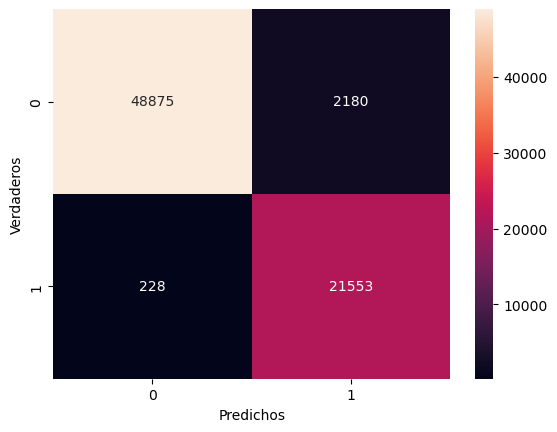

In [22]:
# Aplicando el modelo KNN en undersampling
y_pred_knn = knn.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

print(classification_report(y_test, y_pred_knn))

In [23]:
# Oversampling (os) de la clase minoritaria (Fraude)

os =  RandomOverSampler(sampling_strategy = 0.5, random_state=1234)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución después de resampling {Counter(y_train_res)}')

Distribución antes de resampling Counter({0.0: 152885, 1.0: 65622})
Distribución después de resampling Counter({0.0: 152885, 1.0: 76442})


In [24]:
# Separar los sets de entrenamiento y de testing
X_train_res, X_test, y_train_res, y_test = train_test_split(X, y,random_state=2)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train_res, y_train_res);

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     51055
         1.0       0.91      0.99      0.95     21781

    accuracy                           0.97     72836
   macro avg       0.95      0.97      0.96     72836
weighted avg       0.97      0.97      0.97     72836



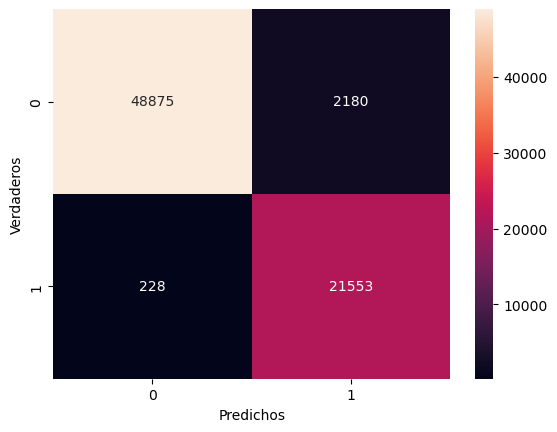

In [25]:
# Aplicando el modelo KNN en Oversampling
y_pred_knn = knn.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

print(classification_report(y_test, y_pred_knn))

In [26]:
# Aplicando modelos conjuntos. (Oversampling (os) y Undersampling (us)) -- Smote-Tomek

os_us = SMOTETomek(sampling_strategy=0.5, random_state=1234)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución antes de resampling {Counter(y_train_res)}')

Distribución antes de resampling Counter({0.0: 152885, 1.0: 65622})
Distribución antes de resampling Counter({0.0: 152119, 1.0: 75676})


In [27]:
# Separar los sets de entrenamiento y de testing
X_train_res, X_test, y_train_res, y_test = train_test_split(X, y,random_state=2)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train_res, y_train_res);


              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     51055
         1.0       0.91      0.99      0.95     21781

    accuracy                           0.97     72836
   macro avg       0.95      0.97      0.96     72836
weighted avg       0.97      0.97      0.97     72836



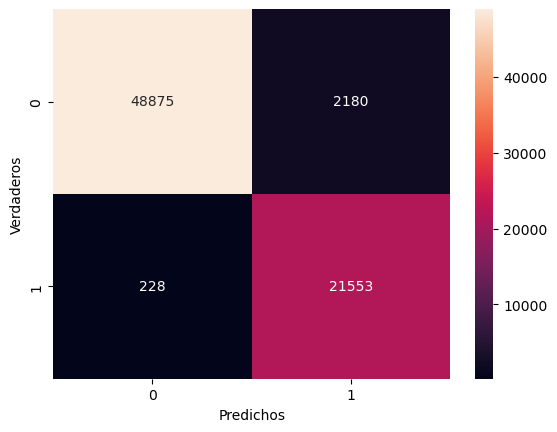

In [28]:
# Aplicando el modelo KNN en smotetomek
y_pred_knn = knn.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

print(classification_report(y_test, y_pred_knn))